<a href="https://colab.research.google.com/github/NiccoloSalvi/naml/blob/main/cancer_diagnostic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/NAML/lab2/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Serum proteomic pattern diagnostics

Dataset from the FDA-NCI Clinical Proteomics Program Databank [1,2].

Each column of `A` represents measurements taken from a patient. There are 216 columns representing 216 patients, out of which 121 are ovarian cancer patients and 95 are normal patients.

Each row represents the ion intensity level at a specific mass-charge value indicated in MZ. There are 4000 mass-charge values, and each row represents the ion-intensity levels of the patients at that particular mass-charge value.

The variable `grp` holds the index information as to which of these samples represent cancer patients and which ones represent normal patients.

- [1] T.P. Conrads, et al., ["High-resolution serum proteomic features for ovarian detection"](https://doi.org/10.1677/erc.0.0110163), Endocrine-Related Cancer, 11, 2004, pp. 163-178.
- [2] E.F. Petricoin, et al., ["Use of proteomic patterns in serum to identify ovarian cancer"](https://doi.org/10.1016/s0140-6736(02)07746-2), Lancet, 359(9306), 2002, pp. 572-577.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ovariancancer_obs_path = 'ovariancancer_obs.csv'
ovariancancer_grp_path = 'ovariancancer_grp.csv'

A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()
f = open(ovariancancer_grp_path)
grp = np.array(f.read().split("\n"))
grp = grp[grp != '']

How many patients? How many features?

In [19]:
# get number of patients
num_patients = A.shape[1]
print(f"Number of patients: {num_patients}")

# get number of features
num_features = A.shape[0]
print(f"Number of features: {num_features}")

Number of patients: 216
Number of features: 4000


How many patiens with and without cancer are there in the dataset?

In [20]:
# get number of patients w/ cancer
num_cancer_patients = np.sum(grp == "Cancer")
print(f"Number of patients with cancer: {num_cancer_patients}")

# get number of patients w/o cancer
num_normal_patients = np.sum(grp == "Normal")
print(f"Number of patients without cancer: {num_normal_patients}")

Number of patients with cancer: 121
Number of patients without cancer: 95


Choose two proteins (between 1 and 4000), and make a scatterplot of the corresponding values plotting with different colors the data corresponding to patients with and without cancer. Can you easily distinguish between patients with/without cancer?

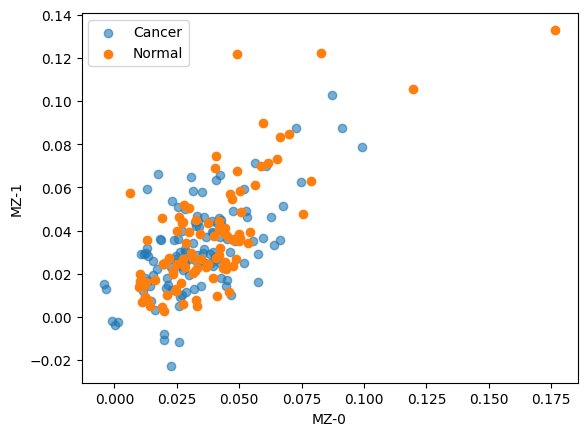

In [28]:
# choose two proteins
protein1 = 0
protein2 = 1

plt.scatter(A[protein1, grp == "Cancer"], A[protein2, grp == "Cancer"], label ='Cancer', alpha=0.6)
plt.scatter(A[protein1, grp == "Normal"], A[protein2, grp == "Normal"], label ='Normal')

plt.xlabel(f"MZ-{protein1}")
plt.ylabel(f"MZ-{protein2}")
plt.legend()
plt.show()

Repeat the previous point, this time by considering three proteins.

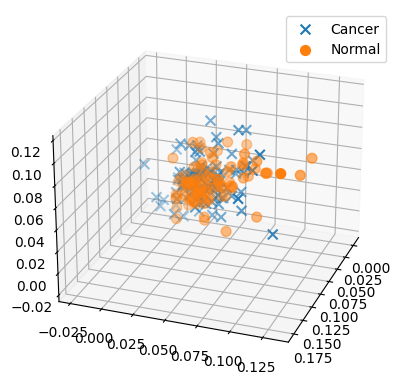

In [33]:
protein1 = 0
protein2 = 1
protein3 = 2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(A[protein1, grp == "Cancer"], A[protein2, grp == "Cancer"], A[protein3, grp == "Cancer"], label="Cancer", marker='x', s=50)
ax.scatter(A[protein1, grp == "Normal"], A[protein2, grp == "Normal"], A[protein3, grp == "Normal"], label="Normal", marker='o', s=50)

plt.legend()
ax.view_init(25,20)

## Principal Components Analysis

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Text(0.5, 1.0, 'Explained Variance')

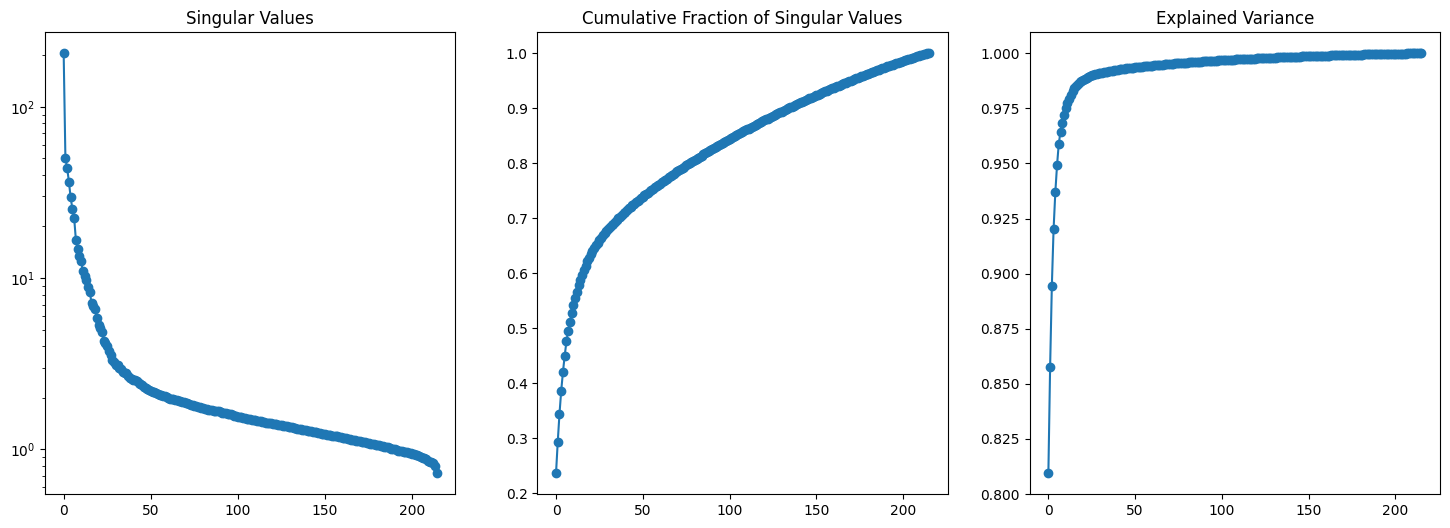

In [43]:
A_mean = A.mean(axis=1)
A_centered = A - A_mean[:, None]

U, S, VT = np.linalg.svd(A_centered, full_matrices=False)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# plot singular values
axs[0].plot(S[:-1], 'o-')
axs[0].set_yscale('log')
axs[0].set_title("Singular Values")

# plot cumulative fraction of singular values
axs[1].plot(np.cumsum(S) / np.sum(S), 'o-')
axs[1].set_title("Cumulative Fraction of Singular Values")

# plot explained variance
axs[2].plot(np.cumsum(S ** 2) / np.sum(S ** 2), 'o-')
axs[2].set_title("Explained Variance")

Make a scatterplot of the first two principal components of the patients.

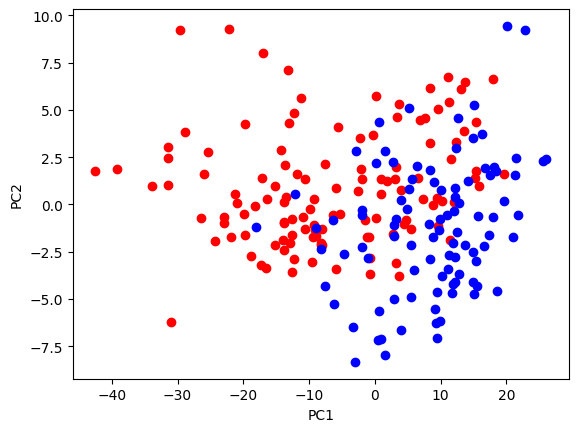

In [81]:
# computing principal components
# the first row of the computed matrix represents the first principal components
# the second row of the computed matrix represents the second principal components, and so on...
pc = A_centered.T @ U

# alternative way, cycling in loop, usefull to distinct Cancer and Normal patients
for i in range(num_patients):
    x = np.inner(A[:, i] - A_mean, U[:, 0])
    y = np.inner(A[:, i] - A_mean, U[:, 1])

    if grp[i] == "Cancer":
        c = "red"
    else:
        c = "blue"

    plt.scatter(x, y, color=c)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Make a scatterplot of the first three principal components of the patients.

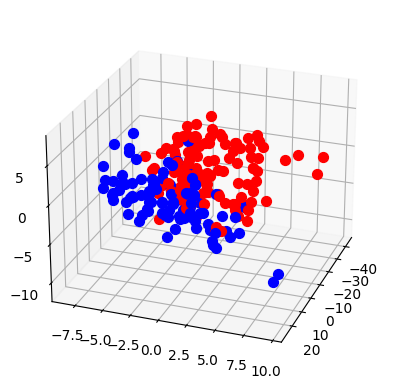

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(num_patients):
    x = np.inner(A[:, i] - A_mean, U[:, 0])
    y = np.inner(A[:, i] - A_mean, U[:, 1])
    z = np.inner(A[:, i] - A_mean, U[:, 2])

    if grp[i] == "Cancer":
        c = "red"
    else:
        c = "blue"

    ax.scatter(x, y, z, color=c, marker='o', s=50)

ax.view_init(25,20)